# Mencari Keuntungan Tertinggi

Sebagai perhatian, seluruh kode ini dijalankan menggunakan backend Python 3.10 dan Scikit Learn 1.3.0.

### Soal

Sebuah perusahaan memiliki 2 produk yakni Produk A dan Produk B. 

Berikut keuntungan yang didapat dari tiap produk tersebut:
- Keuntungan Produk A = Rp. 3000
- Keuntungan Produk B = Rp. 5000

Perusahaan tersebut memiliki 3 Pabrik dengan kapasitas produksi sebagai berikut:
| Pabrik | Waktu Produksi<br>Produk A (Jam) | Waktu Produksi<br>Produk B (Jam) | Total Waktu Produksi<br>yang Tersedia (Jam) |
| --- | --- | --- | --- |
| 1 | 1 | 0 | 4 |
| 2 | 0 | 2 | 12 |
| 3 | 3 | 2 | 18 |

Sebagai Data Scientist, bantulah perusahaan dalam menentukan berapa jumlah produksi optimal untuk produk A dan produk B yang menghasilkan keuntungan paling tinggi.

#### Jawab
---

Diketahui batasan masing-masing pabrik adalah sebagai berikut:

1. x ≤ 4 (Pabrik 1 hanya dapat memproduksi Produk A hingga 4 unit)
2. 2y ≤ 12 atau y ≤ 6 (Pabrik 2 hanya dapat memproduksi Produk B hingga 6 unit)
3. 3x + 2y ≤ 18 (Pabrik 3 dapat memproduksi Produk A dalam waktu 3 jam dan Produk B dalam waktu 2 jam)

Fungsi utama adalah untuk menghitung keuntungan paling tinggi dari produk A dan B:

Profit = 3000x + 5000y

Terdapat dua solusi dalam menyelesaikan masalah ini, yaitu dengan mengabaikan atau mengikutsertakan Pabrik 1 dan Pabrik 2.

##### Solusi 1: Mengabaikan Pabrik 1 dan Pabrik 2

Jika mengabaikan Pabrik 1 dan Pabrik 2, maka batasannya adalah:

3x + 2y ≤ 18

x ≥ 0

y ≥ 0

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

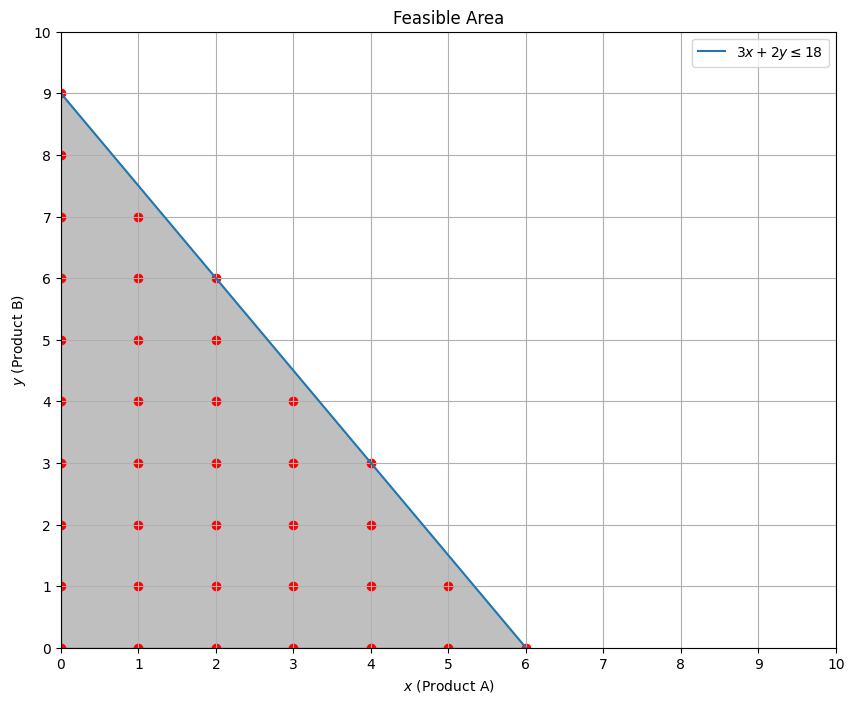

In [2]:
x = np.linspace(0, 10, 400)

# Menghitung y berdasarkan batasan 
y = (18 - 3*x) / 2  # 3x + 2y <= 18 maka y <= (18 - 3x) / 2

# Plot batasan
plt.figure(figsize=(10, 8))
plt.grid(True)
plt.plot(x, y, label=r'$3x + 2y \leq 18$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 11, 1))
plt.xlabel(r'$x$ (Product A)')
plt.ylabel(r'$y$ (Product B)')

# Mengisi daerah feasible
plt.fill_between(x, 0, y, where=(y>=0), color='gray', alpha=0.5)

for i in range(7):
    for j in range(10):
        if 3*i + 2*j <= 18:
            plt.scatter(i, j, color='red')

plt.legend()
plt.title('Feasible Area')
plt.show()


Setelah mengetahui titik-titik feasible, maka dapat dicari keuntungan maksimum dari produk A dan B

In [3]:
profit_values = []
coordinates = []

for i in range(10):
    for j in range(10):
        if 3*i + 2*j <= 18:
            profit = 3000*i + 5000*j
            profit_values.append(profit)
            coordinates.append((i,j))

max_profit = max(profit_values)
optimal_coordinates = coordinates[profit_values.index(max_profit)]
print("Produksi optimal untuk memaksimalkan profit adalah:")
print("Produk A (x):", optimal_coordinates[0])
print("Produk B (y):", optimal_coordinates[1])
print("Profit maksimum (Rp):", max_profit)

df_profit = pd.DataFrame({
    'Produk A (x)': [coord[0] for coord in coordinates],
    'Produk B (y)': [coord[1] for coord in coordinates],
    'Keuntungan (Rp)': profit_values,
    'Sisa Waktu (Jam)': [18 - (3*coord[0] + 2*coord[1]) for coord in coordinates]
})
df_profit_sorted = df_profit.sort_values(by='Keuntungan (Rp)', ascending=False).reset_index(drop=True)
df_profit_sorted

Produksi optimal untuk memaksimalkan profit adalah:
Produk A (x): 0
Produk B (y): 9
Profit maksimum (Rp): 45000


,Produk A (x),Produk B (y),Keuntungan (Rp),Sisa Waktu (Jam)
0,0,9,45000,0
1,0,8,40000,2
2,1,7,38000,1
3,2,6,36000,0
4,0,7,35000,4
5,1,6,33000,3
6,2,5,31000,2
7,0,6,30000,6
8,3,4,29000,1
9,1,5,28000,5


Dengan begitu, total keuntungan dari masing-masing pabrik adalah:

Pabrik 1: 4 * Rp. 3000 + 0 * Rp. 5000 = Rp. 12.000

Pabrik 2: 0 * Rp. 3000 + 6 * Rp. 5000 = Rp. 30.000

Pabrik 3: 0 * Rp. 3000 + 9 * Rp. 5000 = Rp. 45.000

Total keuntungan: Rp. 12.000 + Rp. 30.000 + Rp. 45.000 = Rp. 87.000

##### Solusi 2: Mengikutsertakan Pabrik 1 dan Pabrik 2

Jika mengikutsertakan Pabrik 1 dan Pabrik 2, maka batasannya bertambah menjadi:

3x + 2y ≤ 18

x ≤ 4

y ≤ 6

x ≥ 0

y ≥ 0

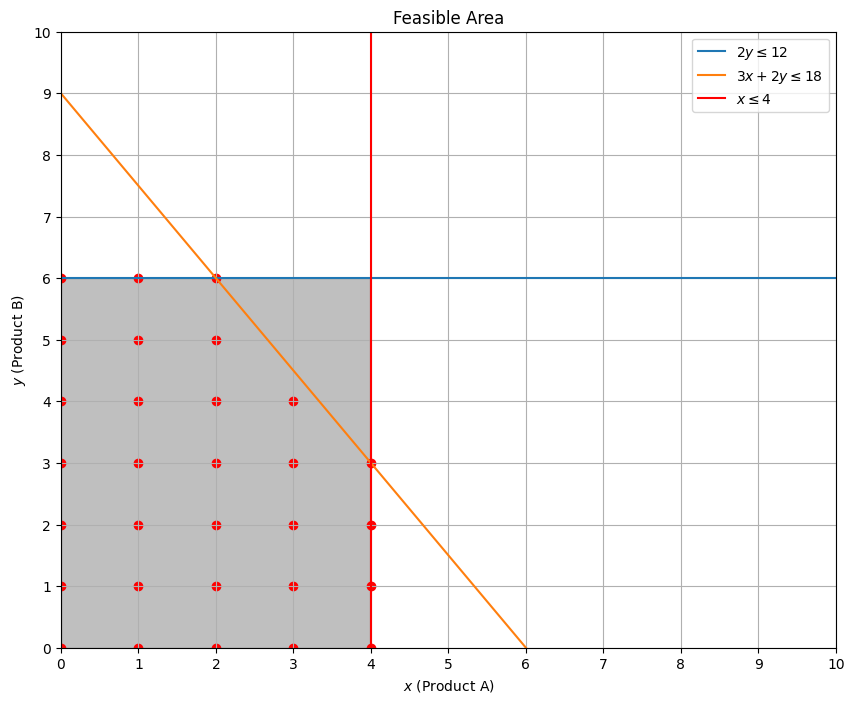

In [4]:
x = np.linspace(0, 10, 400)

# Menghitung y berdasarkan batasan 
y1 = 6 * np.ones_like(x)  # 2y <= 12 maka y <= 6
y2 = (18 - 3*x) / 2       # 3x + 2y <= 18 maka y <= (18 - 3x) / 2

# Plot batasan
plt.figure(figsize=(10, 8))
plt.grid(True)
plt.plot(x, y1, label=r'$2y \leq 12$')
plt.plot(x, y2, label=r'$3x + 2y \leq 18$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.axvline(x=4, color='red', label=r'$x \leq 4$')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 11, 1))
plt.xlabel(r'$x$ (Product A)')
plt.ylabel(r'$y$ (Product B)')

# Mengisi daerah feasible
plt.fill_between(x, 0, y1, where=(x<=4), color='gray', alpha=0.5)

for i in range(7):
    for j in range(10):
        if 3*i + 2*j <= 18:
            if i <= 4:
                if j <= 6:
                    plt.scatter(i, j, color='red')

plt.legend()
plt.title('Feasible Area')
plt.show()

In [5]:
profit_values = []
coordinates = []

for i in range(10):
    for j in range(10):
        if 3*i + 2*j <= 18:
            if i <= 4:
                if j <= 6:
                    profit = 3000*i + 5000*j
                    profit_values.append(profit)
                    coordinates.append((i,j))

max_profit = max(profit_values)
optimal_coordinates = coordinates[profit_values.index(max_profit)]
print("Produksi optimal untuk memaksimalkan profit adalah:")
print("Produk A (x):", optimal_coordinates[0])
print("Produk B (y):", optimal_coordinates[1])
print("Profit maksimum (Rp):", max_profit)

df_profit = pd.DataFrame({
    'Produk A (x)': [coord[0] for coord in coordinates],
    'Produk B (y)': [coord[1] for coord in coordinates],
    'Keuntungan (Rp)': profit_values,
    'Sisa Waktu (Jam)': [18 - (3*coord[0] + 2*coord[1]) for coord in coordinates]
})
df_profit_sorted = df_profit.sort_values(by='Keuntungan (Rp)', ascending=False).reset_index(drop=True)
df_profit_sorted

Produksi optimal untuk memaksimalkan profit adalah:
Produk A (x): 2
Produk B (y): 6
Profit maksimum (Rp): 36000


,Produk A (x),Produk B (y),Keuntungan (Rp),Sisa Waktu (Jam)
0,2,6,36000,0
1,1,6,33000,3
2,2,5,31000,2
3,0,6,30000,6
4,3,4,29000,1
5,1,5,28000,5
6,4,3,27000,0
7,2,4,26000,4
8,0,5,25000,8
9,3,3,24000,3


Dengan begitu, total keuntungan dari masing-masing pabrik adalah:

Pabrik 1: 4 * Rp. 3000 + 0 * Rp. 5000 = Rp. 12.000

Pabrik 2: 0 * Rp. 3000 + 6 * Rp. 5000 = Rp. 30.000

Pabrik 3: 2 * Rp. 3000 + 6 * Rp. 5000 = Rp. 36.000

Total keuntungan: Rp. 12.000 + Rp. 30.000 + Rp. 36.000 = Rp. 78.000

##### Kesimpulan

Walaupun Solusi 1 memberikan keuntungan yang lebih tinggi, Solusi 2 lebih optimal karena mempertimbangkan batasan produksi dari Pabrik 1 dan Pabrik 2. 

Dalam mencari solusi keseluruhan, penting untuk mempertimbangkan keseluruhan batasan, bukan hanya untuk satu pabrik. 

Oleh karena itu, Solusi 2 merupakan pilihan yang paling sesuai dan optimal.
